# Data

## Read data

In [7]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.metrics import ndcg_score

In [29]:

members_csv = pd.read_csv('data/members.csv')
sample_submission_csv = pd.read_csv('data/sample_submission.csv')
song_extra_info_csv = pd.read_csv('data/song_extra_info.csv')
songs_csv = pd.read_csv('data/songs.csv')
test_csv = pd.read_csv('data/test.csv')
train_csv = pd.read_csv('data/train.csv')

## members csv

msno - идентификатор пользователя

city - город

bd: возраст

gender - пол

registered_via - способ регистрации

registration_init_time - начало регистрации

expiration_date - дата окончания

In [30]:
members_csv.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [31]:
members_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [32]:
members_csv.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [28]:
members_csv.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

столбец gender имеет пропущенные значения, а также столбцы с датами (registration_init_time и expiration_date) представлены в формате целых чисел.

## sample submission csv

пример результирующего файла

id - такой же как id в test.csv

target - целевая переменная

In [3]:
sample_submission_csv.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


## song extra info csv

song_id - идентификатор песни

name - название

iscr - Международный стандартный код записи, в теории может использоваться как идентификатор песни

In [4]:
song_extra_info_csv.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [9]:
song_extra_info_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [8]:
song_extra_info_csv.describe()

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81518952
freq,1,1734,207


## song csv

song_id - идентификатор песни

song_length - длительность в миллисекундах

genre_ids - категория жанра

artist_name - имя артиста

composer - композитор

lyricist - автор слов

language - язык


In [5]:
songs_csv.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [12]:
songs_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [13]:
songs_csv.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [28]:
songs_csv.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071358
lyricist       1945306
language             1
dtype: int64

## Test csv

id - идентификатор строки

msno - идентификатор пользователя 

song_id - идентификатор песни

source_system_tab - название вкладки, где произошло событие

source_screen_name - название макета, который видит пользователь

source_type - точка входа, с которой пользователь впервые воспроизводит музыку в мобильных приложениях


In [15]:
test_csv

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [16]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [20]:
test_csv.describe()

,id
count,2.556790e+06
mean,1.278394e+06
std,7.380818e+05
min,0.000000e+00
25%,6.391972e+05
50%,1.278394e+06
75%,1.917592e+06
max,2.556789e+06


## Train csv

msno - идентификатор пользователя 

song_id - идентификатор песни

source_system_tab - название вкладки, где произошло событие

source_screen_name - название макета, который видит пользователь

source_type - точка входа, с которой пользователь впервые воспроизводит музыку в мобильных приложениях

target - целевая переменная

In [11]:
train_csv

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [12]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [13]:
train_csv.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [14]:
train_csv.isnull().sum()


msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

## New data


In [33]:
train_songs = pd.merge(train_csv, songs_csv, on='song_id', how='left')
train_songs_se = pd.merge(train_songs, song_extra_info_csv, on='song_id', how='left')
songs = pd.merge(train_songs_se, members_csv, on='msno', how='left')
# del songs_df, songs_extra_df, members_df, train_df, train_songs, train_songs_se
songs.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [47]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  name                    object 
 13  isrc                    object 
 14  city                    int64  
 15  bd                      int64  
 16  gender                  object 
 17  registered_via          int64  
 18  registration_init_time  int64  
 19  expiration_date         int64  
dtypes: float64(2), int64(6), object(12)
memory usage: 1.2+ GB


In [5]:
songs.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178798
language                      150
name                         1457
isrc                       577858
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

<AxesSubplot:>

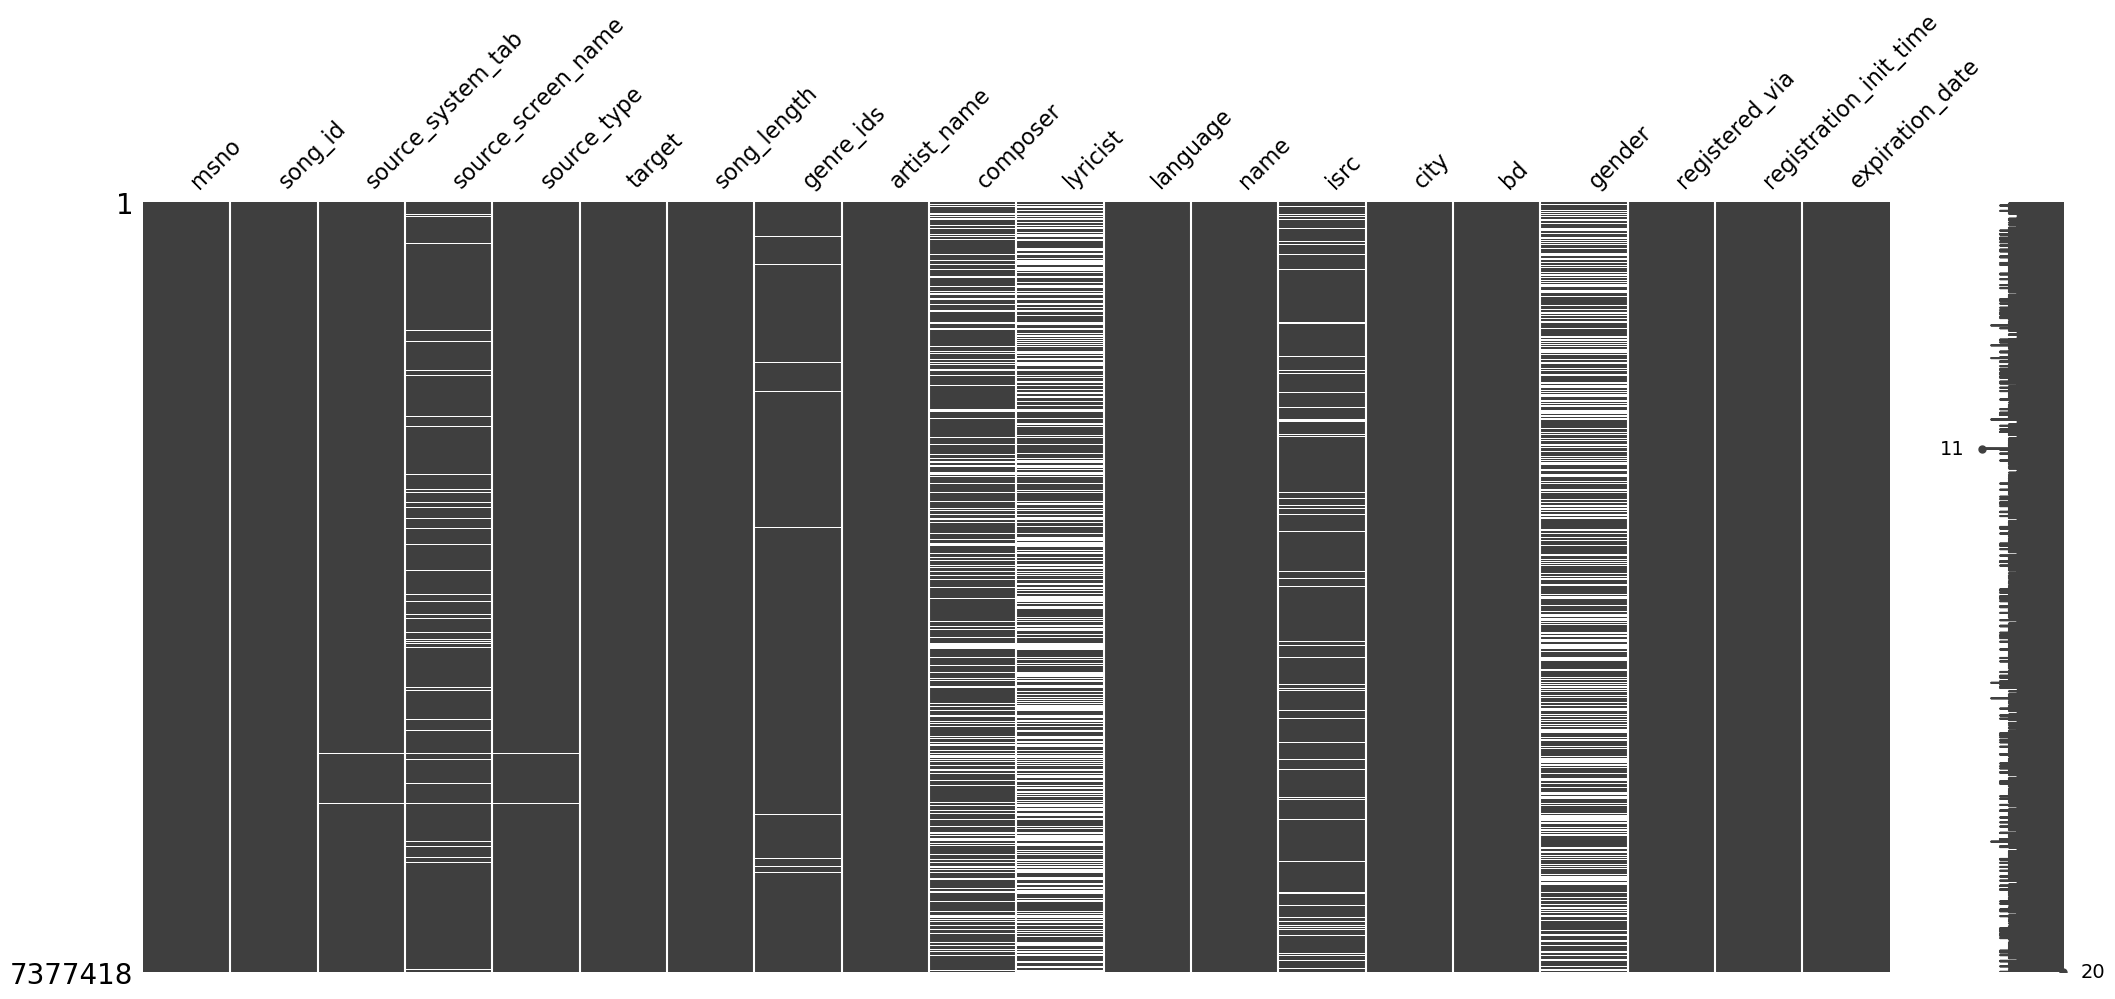

In [6]:

msno.matrix(songs)

In [34]:
for i in songs.select_dtypes(include=['object']).columns:
    songs.loc[songs[i].isnull(), i] = 'unknown'
songs = songs.fillna(value=0)


In [35]:
# registration_init_time
songs.registration_init_time = pd.to_datetime(songs.registration_init_time, format='%Y%m%d', errors='ignore')
songs['registration_init_time_year'] = songs['registration_init_time'].dt.year
songs['registration_init_time_month'] = songs['registration_init_time'].dt.month
songs['registration_init_time_day'] = songs['registration_init_time'].dt.day

# expiration_date
songs.expiration_date = pd.to_datetime(songs.expiration_date,  format='%Y%m%d', errors='ignore')
songs['expiration_date_year'] = songs['expiration_date'].dt.year
songs['expiration_date_month'] = songs['expiration_date'].dt.month
songs['expiration_date_day'] = songs['expiration_date'].dt.day

C:\Users\mongu\AppData\Local\Temp\ipykernel_16336\4066361767.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  songs.registration_init_time = pd.to_datetime(songs.registration_init_time, format='%Y%m%d', errors='ignore')
C:\Users\mongu\AppData\Local\Temp\ipykernel_16336\4066361767.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  songs.expiration_date = pd.to_datetime(songs.expiration_date,  format='%Y%m%d', errors='ignore')


In [36]:
X = songs.drop('target', axis = 1)
y = songs.target

In [37]:

label_encoder = LabelEncoder()
# one_hot = OneHotEncoder()

for i in X.columns :
    X[i] = label_encoder.fit_transform(X[i])

In [38]:
X.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,8158,74679,1,7,6,19021,285,3277,14581,22975,...,2,2,2131,989,8,0,1,14,9,4
1,17259,223479,3,8,4,36985,90,31960,64996,22975,...,0,3,1909,965,7,4,24,14,8,10
2,17259,120758,3,8,4,23676,90,21372,45057,22975,...,0,3,1909,965,7,4,24,14,8,10
3,17259,23707,3,8,4,30970,6,27439,36700,22975,...,0,3,1909,965,7,4,24,14,8,10
4,8158,33308,1,7,6,14878,2,4472,8485,22975,...,2,2,2131,989,8,0,1,14,9,4


### TEST

In [39]:
test_songs = pd.merge(test_csv, songs_csv, on='song_id', how='left')
test_songs_se = pd.merge(test_songs, song_extra_info_csv, on='song_id', how='left')
T_songs = pd.merge(test_songs_se, members_csv, on='msno', how='left')
# songs = songs.head(100)
T_songs.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,愛其實很殘忍,TWUM71400047,1,0,NaN,7,20160219,20170918
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,她說,TWB671005201,1,0,NaN,7,20160219,20170918
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,subarashiki nichijo,JPWP01070260,1,0,NaN,4,20161117,20161124
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,3,30,male,9,20070725,20170430
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,Om Yoga,ITO101121898,3,30,male,9,20070725,20170430


In [40]:
T_id = T_songs.id
T_songs = T_songs.drop('id',axis=1)

T_songs.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,愛其實很殘忍,TWUM71400047,1,0,NaN,7,20160219,20170918
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,她說,TWB671005201,1,0,NaN,7,20160219,20170918
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,subarashiki nichijo,JPWP01070260,1,0,NaN,4,20161117,20161124
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,3,30,male,9,20070725,20170430
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,Om Yoga,ITO101121898,3,30,male,9,20070725,20170430


In [20]:
T_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   song_length             float64
 6   genre_ids               object 
 7   artist_name             object 
 8   composer                object 
 9   lyricist                object 
 10  language                float64
 11  name                    object 
 12  isrc                    object 
 13  city                    int64  
 14  bd                      int64  
 15  gender                  object 
 16  registered_via          int64  
 17  registration_init_time  int64  
 18  expiration_date         int64  
dtypes: float64(2), int64(5), object(12)
memory usage: 390.1+ MB


In [41]:
for i in T_songs.select_dtypes(include=['object']).columns:
    T_songs.loc[T_songs[i].isnull(), i] = 'unknown'
T_songs = T_songs.fillna(value=0)


<AxesSubplot:>

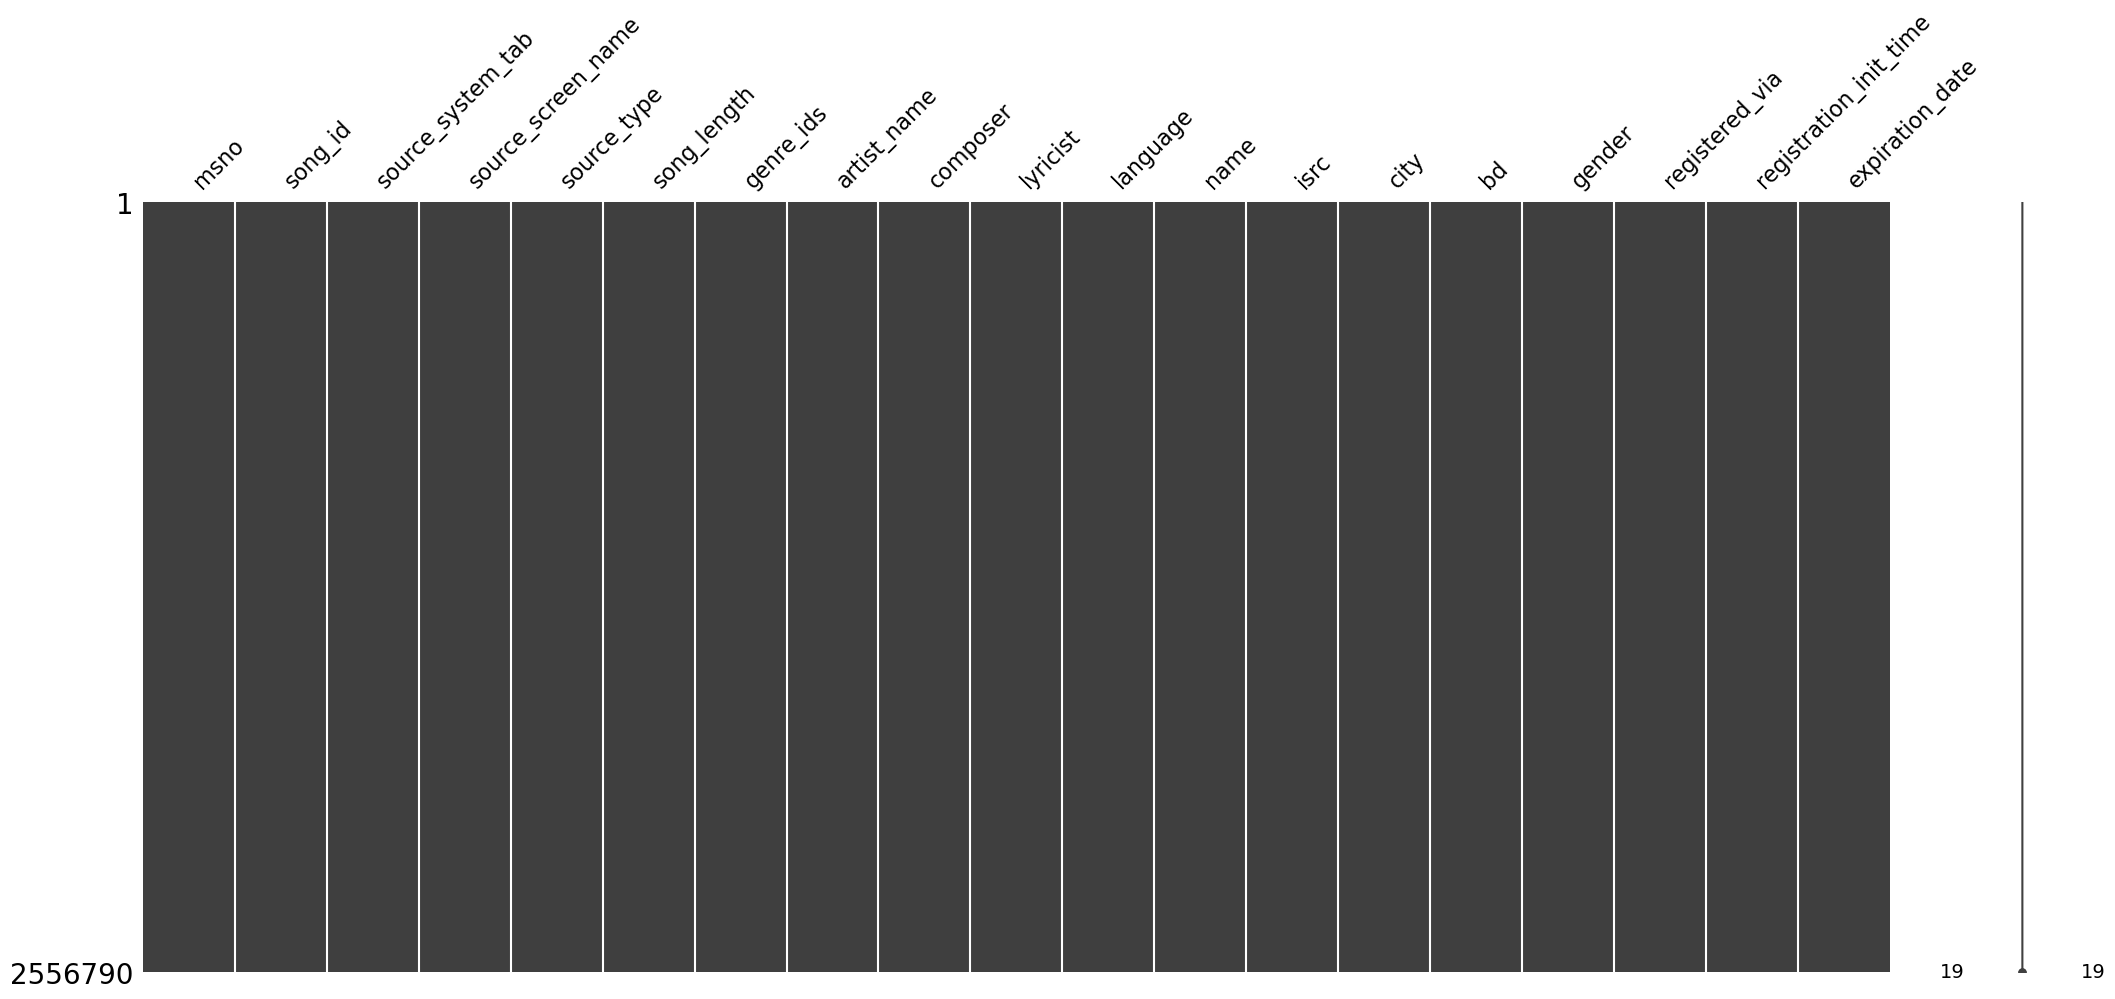

In [31]:
msno.matrix(T_songs)

In [42]:
# registration_init_time
T_songs.registration_init_time = pd.to_datetime(T_songs.registration_init_time, format='%Y%m%d', errors='ignore')
T_songs['registration_init_time_year'] = T_songs['registration_init_time'].dt.year
T_songs['registration_init_time_month'] = T_songs['registration_init_time'].dt.month
T_songs['registration_init_time_day'] = T_songs['registration_init_time'].dt.day

# expiration_date
T_songs.expiration_date = pd.to_datetime(T_songs.expiration_date,  format='%Y%m%d', errors='ignore')
T_songs['expiration_date_year'] = T_songs['expiration_date'].dt.year
T_songs['expiration_date_month'] = T_songs['expiration_date'].dt.month
T_songs['expiration_date_day'] = T_songs['expiration_date'].dt.day

C:\Users\mongu\AppData\Local\Temp\ipykernel_16336\1494053333.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  T_songs.registration_init_time = pd.to_datetime(T_songs.registration_init_time, format='%Y%m%d', errors='ignore')
C:\Users\mongu\AppData\Local\Temp\ipykernel_16336\1494053333.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  T_songs.expiration_date = pd.to_datetime(T_songs.expiration_date,  format='%Y%m%d', errors='ignore')


In [43]:
T_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 25 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   msno                          object        
 1   song_id                       object        
 2   source_system_tab             object        
 3   source_screen_name            object        
 4   source_type                   object        
 5   song_length                   float64       
 6   genre_ids                     object        
 7   artist_name                   object        
 8   composer                      object        
 9   lyricist                      object        
 10  language                      float64       
 11  name                          object        
 12  isrc                          object        
 13  city                          int64         
 14  bd                            int64         
 15  gender                        ob

In [44]:
for i in T_songs.columns :
    T_songs[i] = label_encoder.fit_transform(T_songs[i])

# Model


In [60]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:

rf = RandomForestClassifier(
        n_estimators = 100,
        
)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:

val_pred = rf.predict(X_val)
print("Accuracy :", accuracy_score(y_val, val_pred))

Accuracy : 0.7277530627238249


In [63]:

# Получить вероятности для каждого класса
predictions_proba = np.zeros((len(X_val), 2))  # Создать массив для хранения вероятностей
for tree in rf.estimators_:
    proba = tree.predict_proba(X_val)
    predictions_proba += proba  # Суммировать вероятности отдельных деревьев

# Получить средние вероятности от всех деревьев
predictions_proba /= len(rf.estimators_)

# Вероятность принадлежности к классу 1
probability_class_1 = predictions_proba[:, 1]


c:\ProgramData\Anaconda3\envs\VKenv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\VKenv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\VKenv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\VKenv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\VKenv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\VKenv\lib\site-packages\sklearn\base.py:

In [35]:
len(probability_class_1)

1844355

In [64]:
probability_class_1

array([0.84, 0.67, 0.53, ..., 0.66, 0.43, 0.3 ])

In [65]:


# Задать y_true, содержащий только фактические метки класса
y_true = np.array(y)

#Предсказанные вероятности
predictions_proba = probability_class_1

# Отсортировать вероятности предсказаний для каждого примера по убыванию вероятности класса
sorted_indices = np.argsort(predictions_proba)
sorted_predictions_proba = predictions_proba[sorted_indices]

# Отсортировать y_true соответственно
sorted_y_true = y_true[sorted_indices]

# Вычислить NDCG@20 для отсортированных вероятностей
ndcg_score_val = ndcg_score([sorted_y_true], [sorted_predictions_proba])

print("NDCG@20:", ndcg_score_val)


NDCG@20: 0.967556191017638


## Предсказание для тестовых данных и схоранение

In [66]:
# Получить прогнозы модели
predictions = rf.predict(T_songs)

In [67]:
# Создать DataFrame с прогнозами
predictions_df = pd.DataFrame(T_id, columns=['id'])
# Добавить колонку с идентификаторами объектов
predictions_df['target'] = predictions
# predictions_df = pd.DataFrame(predictions, columns=['target'])
# Сохранить DataFrame в CSV файл
predictions_df.to_csv('predictions.csv', index=False)

In [1]:
!pip install pipreqs

Defaulting to user installation because normal site-packages is not writeable
  Using cached pipreqs-0.5.0-py3-none-any.whl.metadata (7.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ipython-8.12.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached yarg-0.1.9-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using c

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
!pipreqs . --force

INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in .\requirements.txt


In [12]:
!pip freeze > requirements.txt